# Loans Dataset
## by Agustín Ianchina

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each <br>
loan, including loan amount, borrower rate (or interest rate), <br>
current loan status, borrower income, and many others

In [46]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [47]:
df = pd.read_csv('prosperLoanData.csv')
df.head()
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [48]:
var = ['ListingKey', 'ListingCategory (numeric)', 'CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
      'ProsperScore', 'BorrowerState', 'Occupation', 'EmploymentStatus',
      'DelinquenciesLast7Years', 'IncomeRange', 'TotalProsperLoans',
      'LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment']
df = df[var]
df.columns

Index(['ListingKey', 'ListingCategory (numeric)', 'CreditGrade', 'Term',
       'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperScore',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'DelinquenciesLast7Years', 'IncomeRange', 'TotalProsperLoans',
       'LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment'],
      dtype='object')

In [49]:
df.shape

(113937, 17)

In [50]:
df.size

1936929

In [51]:
df.describe(include = 'all')

,ListingKey,ListingCategory (numeric),CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperScore,BorrowerState,Occupation,EmploymentStatus,DelinquenciesLast7Years,IncomeRange,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
count,113937,113937.000000,28953,113937.000000,113937,113912.000000,113937.000000,84853.000000,108422,110349,111682,112947.000000,113937,22085.000000,113937.00000,113937,113937.000000
unique,113066,NaN,8,NaN,12,NaN,NaN,NaN,51,67,8,NaN,8,NaN,NaN,1873,NaN
top,17A93590655669644DB4C06,NaN,C,NaN,Current,NaN,NaN,NaN,CA,Other,Employed,NaN,"$25,000-49,999",NaN,NaN,2014-01-22 00:00:00,NaN
freq,6,NaN,5649,NaN,56576,NaN,NaN,NaN,14717,28617,67322,NaN,32192,NaN,NaN,491,NaN
mean,NaN,2.774209,NaN,40.830248,NaN,0.218828,0.192764,5.950067,NaN,NaN,NaN,4.154984,NaN,1.421100,8337.01385,NaN,272.475783
std,NaN,3.996797,NaN,10.436212,NaN,0.080364,0.074818,2.376501,NaN,NaN,NaN,10.160216,NaN,0.764042,6245.80058,NaN,192.697812
min,NaN,0.000000,NaN,12.000000,NaN,0.006530,0.000000,1.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,1000.00000,NaN,0.000000
25%,NaN,1.000000,NaN,36.000000,NaN,0.156290,0.134000,4.000000,NaN,NaN,NaN,0.000000,NaN,1.000000,4000.00000,NaN,131.620000
50%,NaN,1.000000,NaN,36.000000,NaN,0.209760,0.184000,6.000000,NaN,NaN,NaN,0.000000,NaN,1.000000,6500.00000,NaN,217.740000
75%,NaN,3.000000,NaN,36.000000,NaN,0.283810,0.250000,8.000000,NaN,NaN,NaN,3.000000,NaN,2.000000,12000.00000,NaN,371.580000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   CreditGrade                28953 non-null   object 
 3   Term                       113937 non-null  int64  
 4   LoanStatus                 113937 non-null  object 
 5   BorrowerAPR                113912 non-null  float64
 6   BorrowerRate               113937 non-null  float64
 7   ProsperScore               84853 non-null   float64
 8   BorrowerState              108422 non-null  object 
 9   Occupation                 110349 non-null  object 
 10  EmploymentStatus           111682 non-null  object 
 11  DelinquenciesLast7Years    112947 non-null  float64
 12  IncomeRange                113937 non-null  object 
 13  TotalProsperLoans          22

I will explore the dataset to try to understand the following:<br>
What is the amount and term of Loans?<br>
How does the IncomeRange affects the Amount and Term?<br>
Does the APR depends on the Income Range?<br>
Does the Loan Status show a clear pattern regarding Amount, APR, or Term?<br>
Is there a clear pattern regarding the occupation and Loan Amount, APR, or Status?<br>

## Univariate Exploration

###### Term

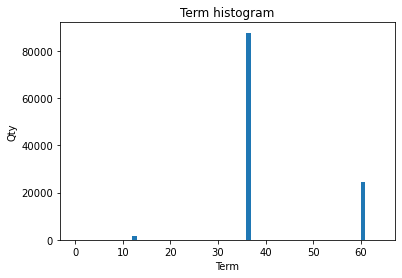

In [53]:
bins = np.arange(0,df['Term'].max()+5, 1) # bins for the histogram, assuming term is a continuous variable.
plt.hist(df['Term'], bins = bins)
plt.xlabel('Term')
plt.ylabel('Qty')
plt.title('Term histogram');

As per the above visual, we understand that term is not a continuous variable.
Therefore, below the corresponding, adequate histogram.

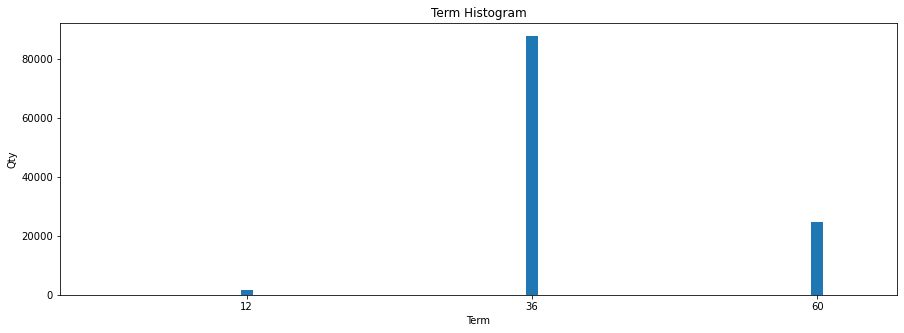

In [54]:
plt.figure(figsize = (15,5))
bins = np.arange(0, df['Term'].max()+5, 1)
plt.hist(df['Term'], bins = bins)
plt.xlabel('Term')
plt.ylabel('Qty')
plt.title('Term Histogram')
plt.xticks(ticks = np.sort(df['Term'].unique())+0.5, labels = np.sort(df['Term'].unique()));

In [55]:
df['Term'].value_counts() # values details

36    87778
60    24545
12     1614
Name: Term, dtype: int64

Term has only three values, and 36 is the most common value, followed by 60. 12 months loans are the most uncommon loans.

###### Occupation

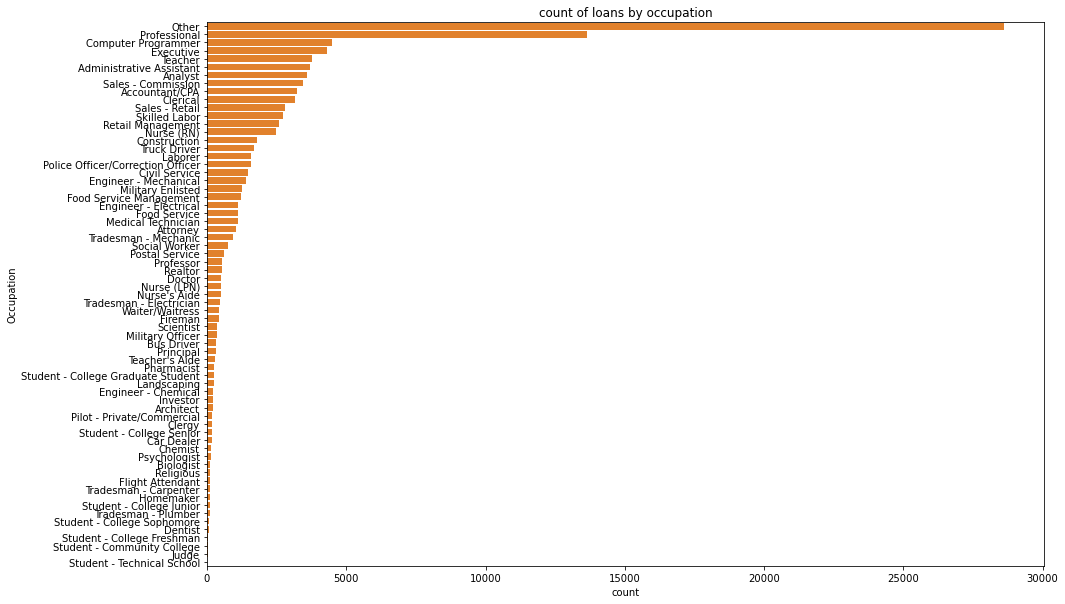

In [136]:
plt.figure(figsize = (15,10))
sb.countplot(y = df['Occupation'], order = df['Occupation'].value_counts().index, color = sb.color_palette()[1])
plt.title('count of loans by occupation');

The most common value for occupation is "other". This is a kind of obstacle, since we can't have much details. <br>
However, we can still see the occupations whicha have the more (and the less) loans in the dataset.

###### Income Range

In [57]:
df['IncomeRange'].value_counts() # detail for values

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

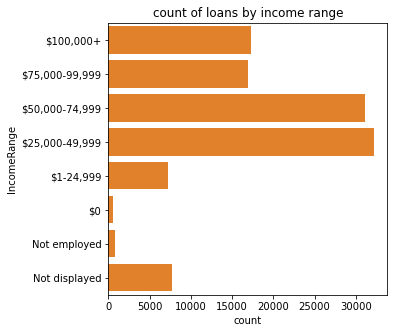

In [137]:
# first we define the order for the income so the visual can make more sense
income_order = ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999',
                '$0','Not employed','Not displayed']
plt.figure(figsize = (5,5))
sb.countplot(data = df, y = 'IncomeRange', color = sb.color_palette()[1],
             order = income_order);
plt.title('count of loans by income range');

We see that between 25k and 75k there are the top categories for Income Range.<br>
0 and Not Employed are the lowest categories.<br>
Suprisingly, +100k appears a significant amount of times.

###### Borrower APR

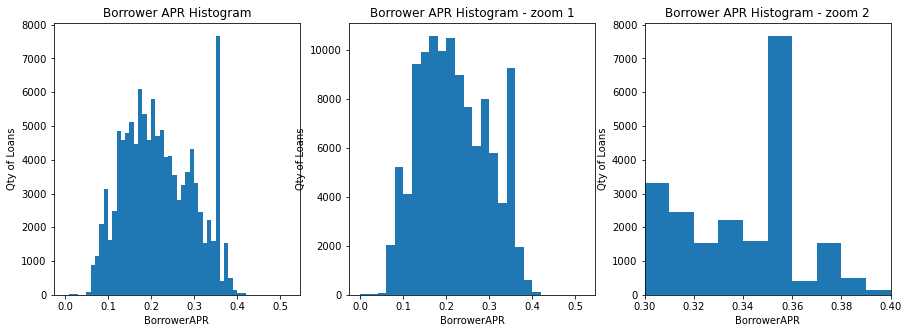

In [139]:
# we include three plots zooming in in some particular ranges.

a = 0.01
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
binsa = np.arange(0, df['BorrowerAPR'].max()+a,a)
plt.hist(df['BorrowerAPR'], bins = binsa)
plt.xlabel('BorrowerAPR')
plt.ylabel('Qty of Loans')
plt.title('Borrower APR Histogram');
b = 0.02
plt.subplot(1,3,2)
binsb = np.arange(0,df['BorrowerAPR'].max()+b,b)
plt.hist(df['BorrowerAPR'], bins = binsb)
plt.xlabel('BorrowerAPR')
plt.ylabel('Qty of Loans')
plt.title('Borrower APR Histogram - zoom 1');
c = 0.01
plt.subplot(1,3,3)
binsc = np.arange(0, df['BorrowerAPR'].max()+c,c)
plt.hist(df['BorrowerAPR'], bins = binsc)
plt.xlim(0.3,0.4)
plt.xlabel('BorrowerAPR')
plt.ylabel('Qty of Loans')
plt.title('Borrower APR Histogram - zoom 2');

Most of the values seem to be between 0.1 and 0.3. However, the highest peak is at 0.36.

###### Loan Original Amount

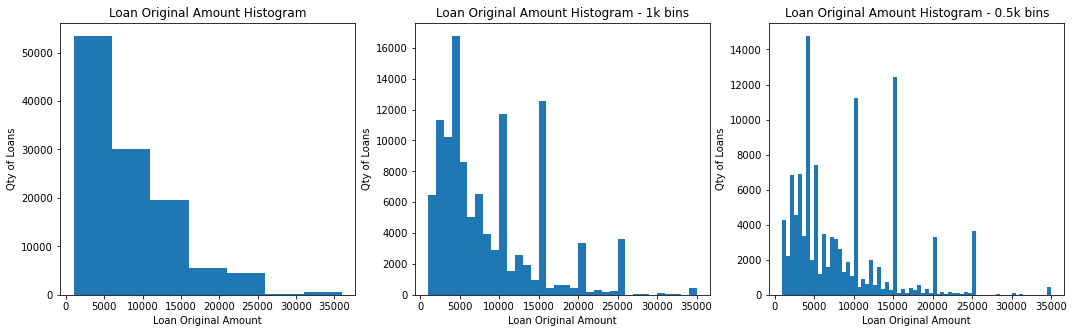

In [141]:
# we include three plots zooming in in some particular ranges.

k1 = 5000
plt.figure(figsize = (18,5))

plt.subplot(1,3,1)
bins = np.arange(df['LoanOriginalAmount'].min(), df['LoanOriginalAmount'].max()+k1,k1)
plt.hist(df['LoanOriginalAmount'], bins = bins)
plt.xlabel('Loan Original Amount')
plt.ylabel('Qty of Loans')
plt.title('Loan Original Amount Histogram');

plt.subplot(1,3,2)
k1 = 1000
bins = np.arange(df['LoanOriginalAmount'].min(), df['LoanOriginalAmount'].max()+k1,k1)
plt.hist(df['LoanOriginalAmount'], bins = bins)
plt.xlabel('Loan Original Amount')
plt.ylabel('Qty of Loans')
plt.title('Loan Original Amount Histogram - 1k bins');

plt.subplot(1,3,3)
k1 = 500
bins = np.arange(df['LoanOriginalAmount'].min(), df['LoanOriginalAmount'].max()+k1,k1)
plt.hist(df['LoanOriginalAmount'], bins = bins)
plt.xlabel('Loan Original Amount')
plt.ylabel('Qty of Loans')
plt.title('Loan Original Amount Histogram - 0.5k bins');

Right skewed distribution. Makes sense. <br>
Calls the attention some peaks at 5k, 10k, 15k, 20k, 25k. Is this because customers like "round" numbers? Or maybe the bank has special offers/plan/products with this amounts? It does not seem likely that "most of the people has the same needs" regarding the amount of the loan.

###### Monthly Loan Payment

C:\AGUS\uSER\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


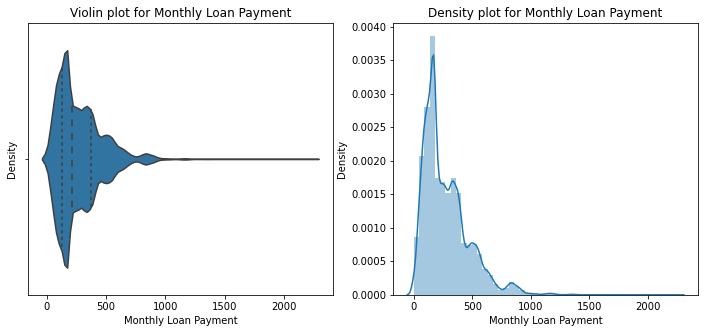

In [142]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sb.violinplot(x = df['MonthlyLoanPayment'], inner = 'quartile')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Density')
plt.title('Violin plot for Monthly Loan Payment');

plt.subplot(1,2,2)
sb.distplot(x = df['MonthlyLoanPayment'])
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Density')
plt.title('Density plot for Monthly Loan Payment');

Most of the values are below 500.

###### Loan Status

In [145]:
status_order = ['Completed', 'Current', 'Chargedoff', 'Past Due (1-15 days)',
               'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (61-90 days)'
               ,'Past Due (91-120 days)', 'Past Due (>120days)', 'Defaulted', 'Cancelled']
#sb.countplot(y = df['LoanStatus'], order = df['LoanStatus'].value_counts().index)
#plt.title('Count of Loans for each Loan Status');

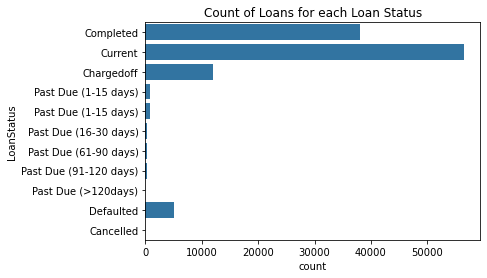

In [144]:
status_order = ['Completed', 'Current', 'Chargedoff', 'Past Due (1-15 days)',
               'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (61-90 days)'
               ,'Past Due (91-120 days)', 'Past Due (>120days)', 'Defaulted', 'Cancelled']
sb.countplot(y = df['LoanStatus'], order = status_order, color = sb.color_palette()[0])
plt.title('Count of Loans for each Loan Status');

Most of the loans are ongoing or completed. <br>
However, there is a % of Chargedoffs and Defaulted.<br>
These four categories are the top ones for all the loans.

## Bivariate Exploration

###### Loan Original Amount vs BorrowerAPR

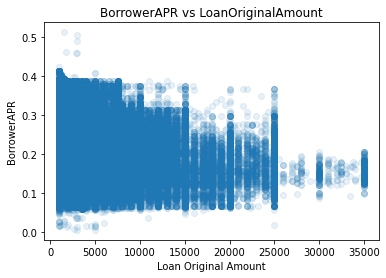

In [146]:
plt.scatter(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = 0.1)
plt.xlabel('Loan Original Amount')
plt.ylabel('BorrowerAPR')
plt.title('BorrowerAPR vs LoanOriginalAmount');

It does not look like the APR has a direct relationship with the LoanAmount.

###### Loan Original Amount vs Term

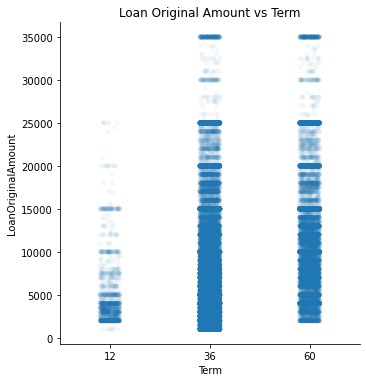

In [147]:
sb.catplot(data = df, x = 'Term', y = 'LoanOriginalAmount', alpha = 0.05, color = sb.color_palette()[0])
plt.title('Loan Original Amount vs Term');

It does look like that 12 months loans are usually below 10k. <br>
There is little difference in Loan Amount between 36 and 60 months terms.

###### Loan Amount vs Term vs BorrowerAPR - matrix

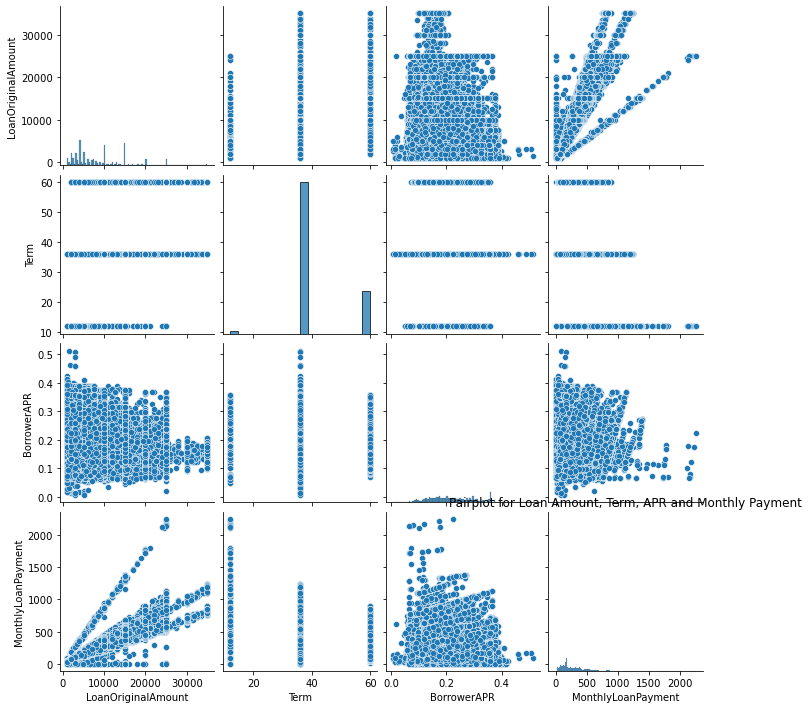

In [148]:
sb.pairplot(data = df[['LoanOriginalAmount', 'Term', 'BorrowerAPR', 'MonthlyLoanPayment']])
plt.title('Pairplot for Loan Amount, Term, APR and Monthly Payment');

All terms are 12, 36, or 60.<br>
There is a wider range of MonthlyLoanPayments for shorter term loans. (12months is wider than 36, which is also wider than 60).<br>
For Monthly Loan Payment, and Loan Original Amount, there are three straight lines that stand out. They are likely correlated with the three possible terms(12,36,60).

###### Income Range vs BorrowerAPR

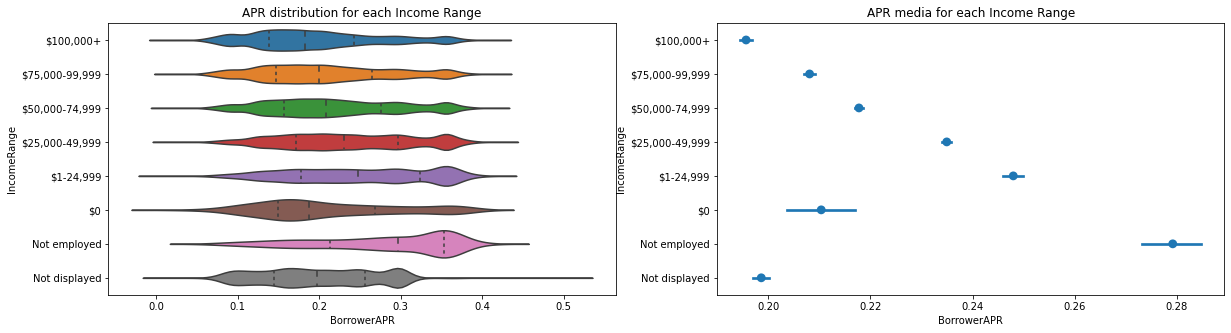

In [149]:
# two plots, violin and pointplot to get a "complete sense" of the distribution.

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sb.violinplot(data = df, x = 'BorrowerAPR', y = 'IncomeRange', inner = 'quartile', order = income_order)
plt.title('APR distribution for each Income Range');

plt.subplot(1,2,2)
sb.pointplot(data = df, x = 'BorrowerAPR', y = 'IncomeRange', linestyles = "", order = income_order)
plt.title('APR media for each Income Range');

Distributions are very similar for income higher than 0. This stands out vs NotEmployed, category who faces a more left skewed distribution (meanAPR clos to 0.28). <br>
Higher IncomeRange pay in average lower APR. The minimum goes for +100k with a mean APR close to 0.2.
Though all distributions show a "peak"(higher density) in 0.36, this peak is less significant for higher IncomeRanges.

###### IncomeRange vs LoanOriginalAmount

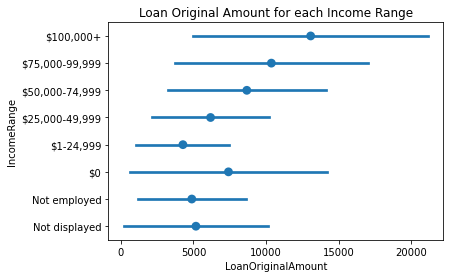

In [150]:
sb.pointplot(data = df, x = 'LoanOriginalAmount', y = 'IncomeRange', linestyles = "", order = income_order, ci = 'sd')
plt.title('Loan Original Amount for each Income Range');

On avearge, higher IncomeRange are correlated with higher LoanAmounts.<br>
It makes sense, beacuse we might think that it's safer for the bank. However, it also make us think whether this behaviour might increase inequality in the long term.

###### Quantity of Loans by IncomeRange and LoanStatus

In [69]:
# creating the dataset for the heatmap

counts = df.groupby(['IncomeRange','LoanStatus']).size()
counts = counts.reset_index()
counts = pd.pivot(data = counts, index = 'IncomeRange', columns = 'LoanStatus', values = 0)
counts = pd.DataFrame(income_order, columns = ['IncomeRange']).merge(counts, on = 'IncomeRange').set_index('IncomeRange')
counts

,Cancelled,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
IncomeRange,,,,,,,,,,,,
"$100,000+",NaN,968.0,4774.0,10916.0,322.0,52.0,134.0,40.0,65.0,38.0,28.0,NaN
"$75,000-99,999",NaN,1153.0,4914.0,10139.0,375.0,26.0,131.0,37.0,55.0,52.0,33.0,1.0
"$50,000-74,999",NaN,2633.0,9282.0,17615.0,874.0,64.0,212.0,83.0,89.0,92.0,99.0,7.0
"$25,000-49,999",1.0,4162.0,10891.0,15111.0,1290.0,49.0,266.0,80.0,119.0,102.0,114.0,7.0
"$1-24,999",NaN,1329.0,2908.0,2536.0,334.0,14.0,52.0,20.0,32.0,22.0,27.0,NaN
$0,NaN,185.0,370.0,11.0,51.0,NaN,2.0,NaN,NaN,1.0,NaN,1.0
Not employed,NaN,182.0,325.0,248.0,25.0,NaN,9.0,5.0,3.0,6.0,3.0,NaN
Not displayed,4.0,1380.0,4610.0,NaN,1747.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


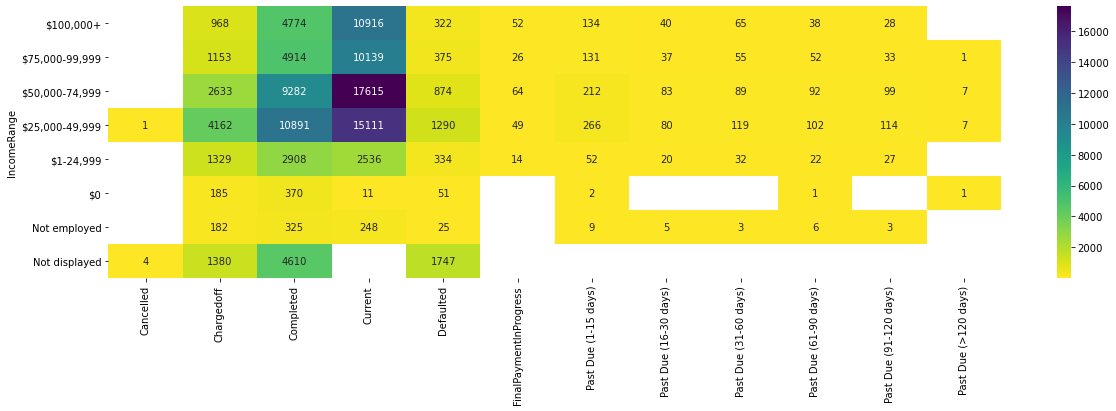

In [70]:
plt.figure(figsize = (20,5))
sb.heatmap(data = counts, annot = True, vmin = 1, cmap = 'viridis_r', fmt = '.0f');

The hotter region is for Curren/Completed and 25-75k. This region shows the higher amount of loans.<br>
Chargedoff and Defaulted are very closed.<br>
Completed and Income NotDisplayed stands out.

###### Quantity of loans by Income Range and Occupation

In [71]:
income_order # checking the order for the income ranges.

['$100,000+',
 '$75,000-99,999',
 '$50,000-74,999',
 '$25,000-49,999',
 '$1-24,999',
 '$0',
 'Not employed',
 'Not displayed']

In [72]:
# creating the dataset for the heatmap.

occ_inc = df.groupby(['IncomeRange', 'Occupation']).size().reset_index()
occupation = df['Occupation'].value_counts().reset_index()[0:16]
booleanfilter = occ_inc.Occupation.isin(occupation['index'])
occ_inc = occ_inc[booleanfilter]
occ_inc = pd.pivot(data = occ_inc, index = 'Occupation', columns = 'IncomeRange', values = 0)
occ_inc = occ_inc[income_order]
occ_inc

IncomeRange,"$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999",$0,Not employed,Not displayed
Occupation,,,,,,,,
Accountant/CPA,659.0,603.0,1081.0,730.0,39.0,4.0,NaN,117.0
Administrative Assistant,60.0,174.0,922.0,2037.0,301.0,13.0,NaN,181.0
Analyst,603.0,951.0,1225.0,640.0,18.0,4.0,1.0,160.0
Clerical,15.0,58.0,488.0,1900.0,392.0,9.0,NaN,302.0
Computer Programmer,1282.0,1356.0,1075.0,450.0,41.0,11.0,NaN,263.0
Construction,261.0,316.0,599.0,437.0,57.0,26.0,NaN,94.0
Executive,2387.0,800.0,690.0,236.0,22.0,13.0,NaN,163.0
Nurse (RN),513.0,737.0,978.0,195.0,16.0,1.0,NaN,49.0
Other,2668.0,3306.0,7481.0,9757.0,2770.0,281.0,771.0,1583.0


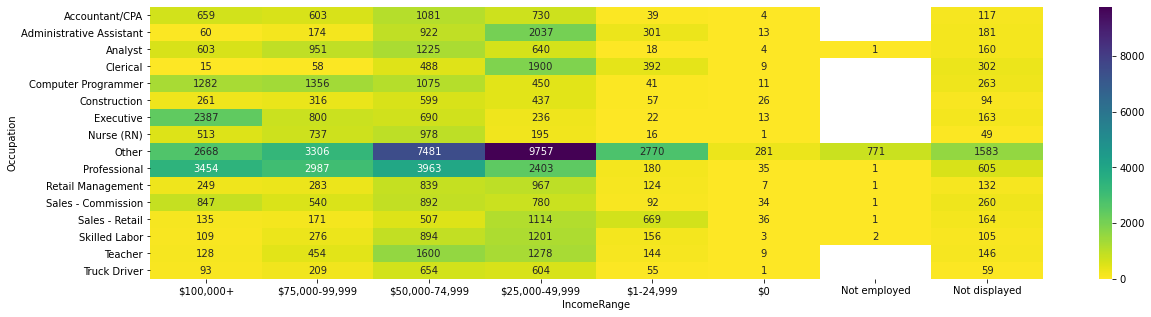

In [73]:
plt.figure(figsize = (20,5))
sb.heatmap(data = occ_inc, vmin = 000, annot = True, fmt = '0.0f', cmap = 'viridis_r');

Other is higher for the 25-75k range. <br>
Executive and Professional stand out in +100k. <br>

###### Loan Status vs LoanOriginalAmount

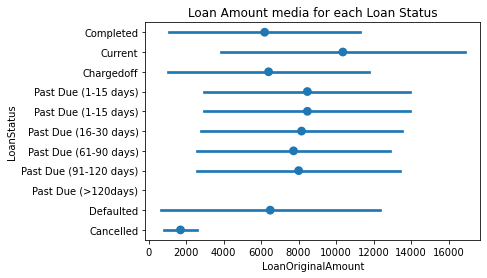

In [151]:
sb.pointplot(data = df, y = 'LoanStatus', x = 'LoanOriginalAmount', linestyles = "", ci = 'sd', order = status_order)
plt.title('Loan Amount media for each Loan Status');

Cancelled Loans have the lower Amount (on average).<br>
On average, Defaulted, Chargedoff and Completed have quite similar Loan Amounts.(6k)

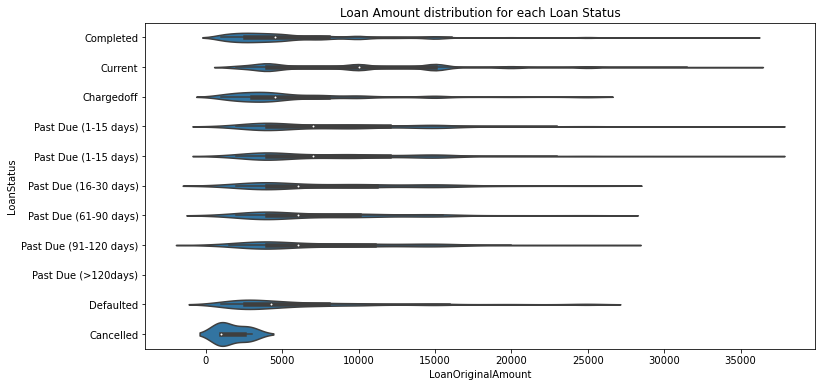

In [152]:
plt.figure(figsize = (12,6))
sb.violinplot(data = df, x = 'LoanOriginalAmount', y = 'LoanStatus', color = sb.color_palette()[0], order = status_order)
plt.title('Loan Amount distribution for each Loan Status');

All cancelled Loans are below 10k.

###### Loan Status vs Term

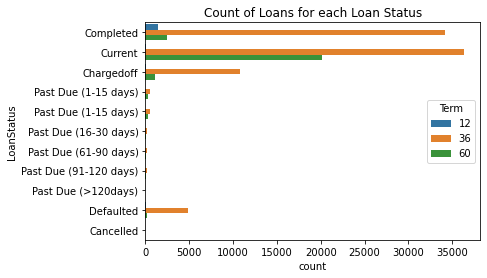

In [153]:
sb.countplot(data = df, y = 'LoanStatus', hue = 'Term', order = status_order)
plt.title('Count of Loans for each Loan Status');

There are no 60months Loans defaulted, nor 12 months Loans. <br>
There are no 12 months Loans Chargedoff

###### Loan Status vs BorrowerAPR

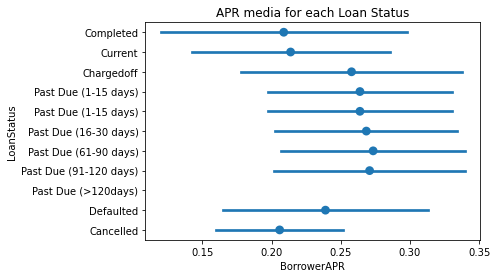

In [154]:
sb.pointplot(data = df, y = 'LoanStatus', x = 'BorrowerAPR', linestyles = "", ci = 'sd', order = status_order)
plt.title('APR media for each Loan Status');

The lowest three APR Rates are the Completed/Current and Cancelled Loans.<br>
The highest APR is for the past due >120d

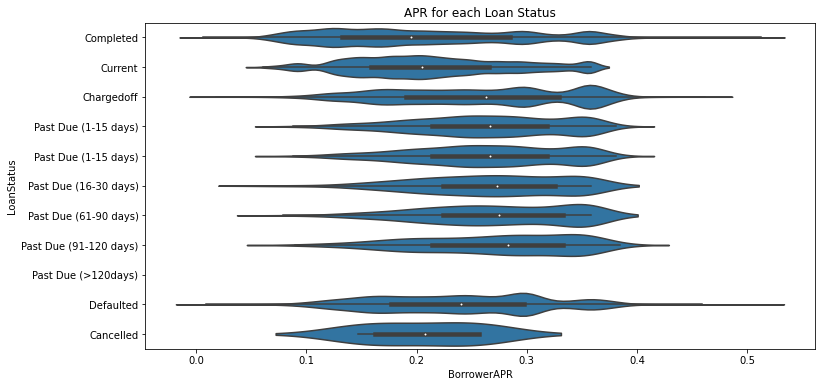

In [155]:
plt.figure(figsize = (12,6))
sb.violinplot(data = df, x = 'BorrowerAPR', y = 'LoanStatus', color = sb.color_palette()[0], order = status_order)
plt.title('APR for each Loan Status');

Completed Loans distribution stands out with a high density between 0.1 and 0.15(Same as Final PaymentProgress).

###### Quantity of Loans vs IncomeRange vs Term

In [81]:
# creating the table for the heatmap. Step 1

term_inc_am = df.groupby(['Term', 'IncomeRange','LoanOriginalAmount']).size().reset_index()
term_inc_am.head()

term_inc_am_pivot = term_inc_am.pivot_table(values = 0, index = 'IncomeRange', columns = 'Term', aggfunc = sum)
term_inc_am_pivot

Term,12,36,60
IncomeRange,,,
$0,NaN,617.0,4.0
"$1-24,999",77.0,6409.0,788.0
"$100,000+",387.0,12150.0,4800.0
"$25,000-49,999",381.0,25485.0,6326.0
"$50,000-74,999",432.0,22682.0,7936.0
"$75,000-99,999",311.0,12028.0,4577.0
Not displayed,NaN,7741.0,NaN
Not employed,26.0,666.0,114.0


In [82]:
# ordering the income ranges, so the heat map is more consistent.

inc_ord = pd.DataFrame(income_order, columns = ['IncomeRange'])
inc_ord

,IncomeRange
0,"$100,000+"
1,"$75,000-99,999"
2,"$50,000-74,999"
3,"$25,000-49,999"
4,"$1-24,999"
5,$0
6,Not employed
7,Not displayed


In [83]:
# creating the table for the heatmap. Step 2.

inc_ord = inc_ord.merge(term_inc_am_pivot, on = 'IncomeRange').set_index('IncomeRange')
inc_ord

,12,36,60
IncomeRange,,,
"$100,000+",387.0,12150.0,4800.0
"$75,000-99,999",311.0,12028.0,4577.0
"$50,000-74,999",432.0,22682.0,7936.0
"$25,000-49,999",381.0,25485.0,6326.0
"$1-24,999",77.0,6409.0,788.0
$0,NaN,617.0,4.0
Not employed,26.0,666.0,114.0
Not displayed,NaN,7741.0,NaN


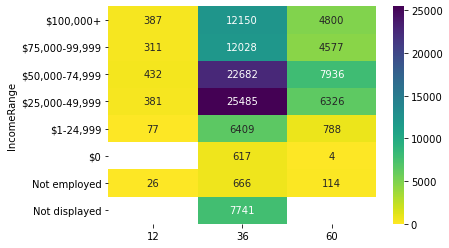

In [84]:
sb.heatmap(data = inc_ord, cmap = 'viridis_r', annot = True, fmt = '0.0f', vmin = 0);

The hottest zone is Income Range between 25-75k and 36 months. <br>
25-75k has the highest amount of Loans for all terms.<br>
12 Months Loans has the lowest amount of Loans for all IncomeRanges.<br>

## Multivariate Exploration

###### LoanOriginalAmount vs MonthlyLoanPayment and Term

In [85]:
df['LoanOriginalAmount'] = df['LoanOriginalAmount'].astype('float64')

In [86]:
df['Term'].unique()

array([36, 60, 12], dtype=int64)

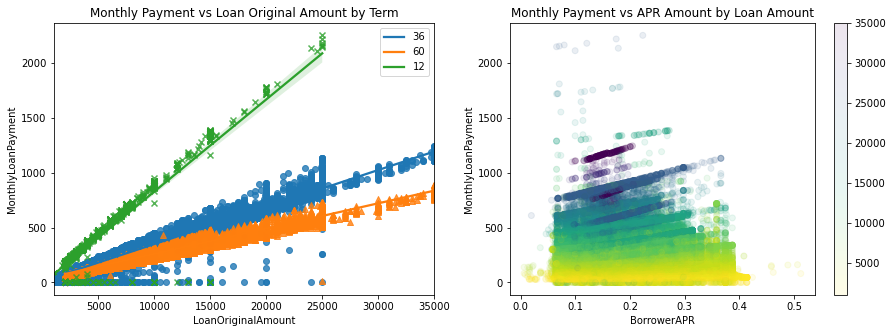

In [156]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
term = [[36, 'o'],[60,'^'],[12,'x']]
for term,shape in term:
    plot = df.loc[df['Term']==term]
    sb.regplot(data = plot, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', fit_reg = True, marker = shape)
plt.legend(['36','60','12'])    
plt.title('Monthly Payment vs Loan Original Amount by Term');
#plt.scatter(data = df, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', c = 'Term', alpha = 0.2);
#plt.colorbar();
plt.subplot(1,2,2)
plt.scatter(data = df, c = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', x = 'BorrowerAPR', alpha = 0.1,
           cmap = 'viridis_r')
plt.xlabel('BorrowerAPR')
plt.ylabel('MonthlyLoanPayment')
plt.colorbar()
plt.title('Monthly Payment vs APR Amount by Loan Amount');
#plt.legend();

As expected, we see three reg_lines, one for each term. This implies that the Monthly Payment is directly correlated with the Loan Amount, and the slope depends on the term. <br>
The range of APR is higher for lower LoanAmounts.<br>
Higher LoanAmounts, are correlated with higher monthly payments and narrower range (and lower) of APR.

###### LoanAmount vs IncomeRange and Term

In [88]:
# creating the table for the visual.

term_inc_am = df.groupby(['Term', 'IncomeRange','LoanOriginalAmount']).size().reset_index()
term_inc_am.head()

,Term,IncomeRange,LoanOriginalAmount,0
0,12,"$1-24,999",1000.0,1
1,12,"$1-24,999",2000.0,34
2,12,"$1-24,999",2200.0,1
3,12,"$1-24,999",2500.0,8
4,12,"$1-24,999",2800.0,1


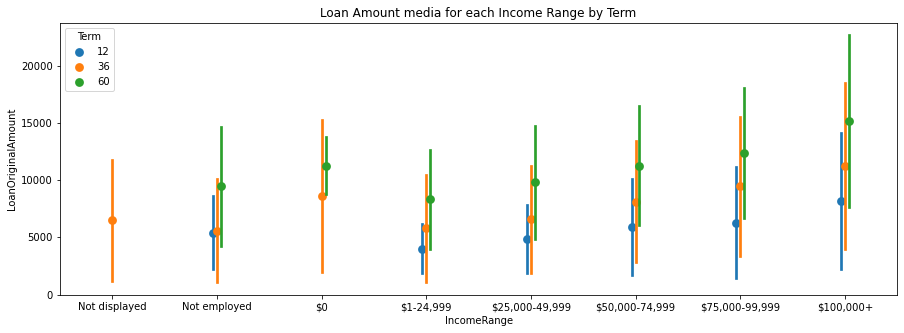

In [157]:
income_order_reverse = income_order.copy()
income_order_reverse.reverse()
plt.figure(figsize = (15,5))
sb.pointplot(data = term_inc_am, y = 'LoanOriginalAmount', x = 'IncomeRange', hue = 'Term',
            linestyles = "", ci = 'sd', dodge = True, order = income_order_reverse)
plt.title('Loan Amount media for each Income Range by Term');

On average higher Income relates to higher LoanAmounts. <br>
On average, shorter Loans are lower Amount Loans, for all IncomeRanges.<br>
For NotEmployed, 12months Loans are on average, the same LoanAmount than 36 months Loans.<br>
$0 IncomeRange do not have 12 months Loans, and the LoanAmount is on average, similar to 25-50k.

###### Loan Status vs Term and APR

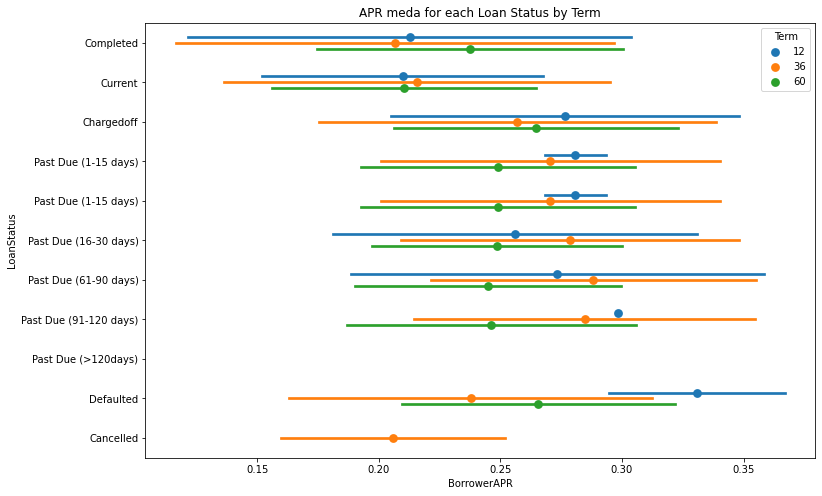

In [158]:
plt.figure(figsize = (12,8))
sb.pointplot(data = df, x = 'BorrowerAPR', y = 'LoanStatus', hue = 'Term', linestyles = "", ci = 'sd', dodge = 0.3, 
            order = status_order)
plt.title('APR meda for each Loan Status by Term');

There are no 12 months loans past due>120days.<br>
For defaulted loans, 12months loans show on average the highest APR.<br>
All cancelled Loans are 36 Months Loans.<br>
12 Month Loans show on average lowest APR for FinalPaymentProgress Loans.